In [4]:
import pandas as pd

# Load the data
file_path = "C:/Users/USER/OneDrive - University of Lincoln/Desktop/Tracy/Work/Portofolio/Birthday/Birthday Wishes.xlsx"
data = pd.read_excel(file_path)

data.head()


,Name,Duration of Friendship (In Years),Their Birthday,Did I Wish Them,My Mode of Delivery,Did They Wish Me,On That Day,Their Mode of Delivery,Gift (In the past year)
0,Abenaa,8,After,N,Nul,N,N,Nul,N
1,Adom,11,After,Y,Text,Y,Y,Call,N
2,Ama,1,Nul,N,Nul,Y,Y,Text,N
3,Awurama,1,Before,Y,Call/Post,Y,Y,Call/Post,Y
4,Ayeyi,11,After,Y,Text,Y,Y,Call,N


In [6]:
# Count the total number of friends
total_friends = len(data)

# How many friends wished me
total_wished_me = data[data['Did They Wish Me'] == 'Y'].shape[0]

# Timely wishes
timely_wishes = data[(data['Did They Wish Me'] == 'Y') & (data['On That Day'] == 'Y')].shape[0]

# Belated wishes
belated_wishes = data[(data['Did They Wish Me'] == 'Y') & (data['On That Day'] == 'N')].shape[0]

# Who reciprocated my efforts
reciprocated = data[(data['Did I Wish Them'] == 'Y') & (data['Did They Wish Me'] == 'Y')].shape[0]
not_reciprocated = data[(data['Did I Wish Them'] == 'Y') & (data['Did They Wish Me'] == 'N')].shape[0]

print(f"Total Friends: {total_friends}")
print(f"Friends Who Wished Me: {total_wished_me}")
print(f"Timely Wishes: {timely_wishes}")
print(f"Belated Wishes: {belated_wishes}")
print(f"Reciprocated Efforts: {reciprocated}")
print(f"Efforts Not Reciprocated: {not_reciprocated}")


Total Friends: 36
Friends Who Wished Me: 27
Timely Wishes: 24
Belated Wishes: 3
Reciprocated Efforts: 21
Efforts Not Reciprocated: 5


In [7]:
# Preferred mode of delivery
delivery_mode = data.groupby('Their Mode of Delivery')['Did They Wish Me'].count()

print("\nPreferred Mode of Delivery:")
print(delivery_mode)



Preferred Mode of Delivery:
Their Mode of Delivery
Call          3
Call/Post     3
Nul           8
Text         17
Text/Post     5
Name: Did They Wish Me, dtype: int64


In [8]:
# Average friendship duration for those who wished
avg_duration_wished = data[data['Did They Wish Me'] == 'Y']['Duration of Friendship (In Years)'].mean()

# Check gift analysis
gifts_received = data[data['Gift (In the past year)'] == 'Y'].shape[0]

print(f"\nAverage Friendship Duration (Wished Me): {avg_duration_wished} years")
print(f"Gifts Received in the Past Year: {gifts_received}")



Average Friendship Duration (Wished Me): 5.7407407407407405 years
Gifts Received in the Past Year: 8


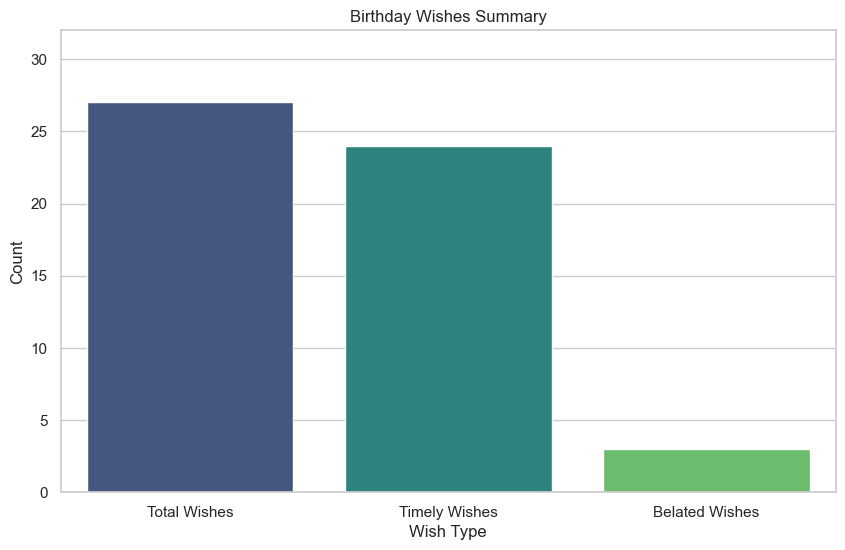

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid')

# Bar chart for wishes I received
wish_counts = [total_wished_me, timely_wishes, belated_wishes]
wish_labels = ['Total Wishes', 'Timely Wishes', 'Belated Wishes']

plt.figure(figsize=(10, 6))
sns.barplot(x=wish_labels, y=wish_counts, palette='viridis')
plt.title('Birthday Wishes Summary')
plt.ylabel('Count')
plt.xlabel('Wish Type')
plt.ylim(0, max(wish_counts) + 5)
plt.show()


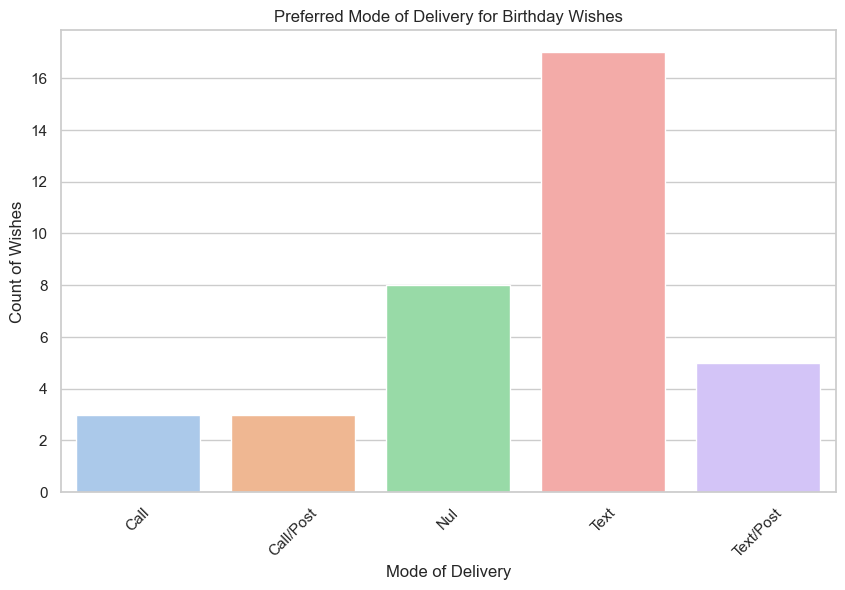

In [10]:
# Preferred mode of delivery
delivery_mode = data.groupby('Their Mode of Delivery')['Did They Wish Me'].count().reset_index()

# Bar chart for mode of delivery
plt.figure(figsize=(10, 6))
sns.barplot(x='Their Mode of Delivery', y='Did They Wish Me', data=delivery_mode, palette='pastel')
plt.title('Preferred Mode of Delivery for Birthday Wishes')
plt.ylabel('Count of Wishes')
plt.xlabel('Mode of Delivery')
plt.xticks(rotation=45)
plt.show()


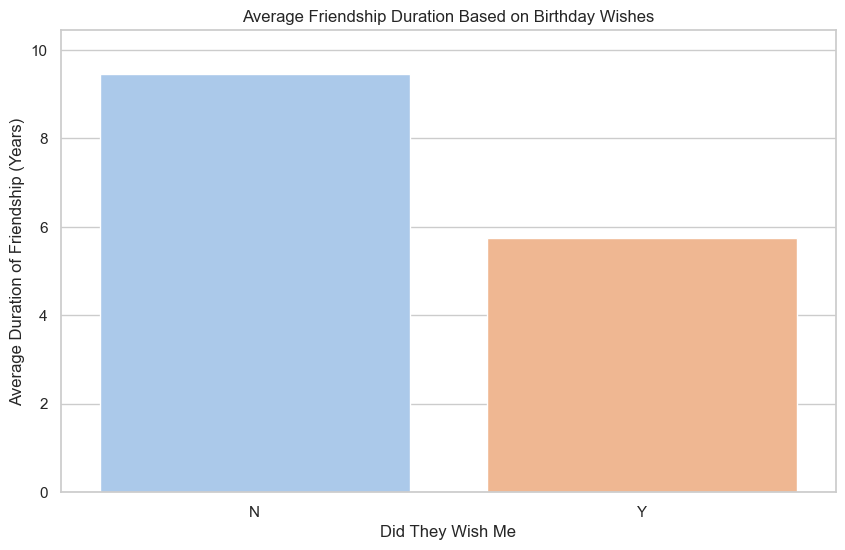

In [12]:
# Average friendship duration based on whether they wished me or not
avg_duration = data.groupby('Did They Wish Me')['Duration of Friendship (In Years)'].mean().reset_index()

# Bar plot for average friendship duration
plt.figure(figsize=(10, 6))
sns.barplot(x='Did They Wish Me', y='Duration of Friendship (In Years)', data=avg_duration, palette='pastel')
plt.title('Average Friendship Duration Based on Birthday Wishes')
plt.ylabel('Average Duration of Friendship (Years)')
plt.xlabel('Did They Wish Me')
plt.ylim(0, max(avg_duration['Duration of Friendship (In Years)']) + 1)
plt.show()



In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=wish_labels, y=wish_counts, palette='viridis')
plt.title('Birthday Wishes Summary')
plt.ylabel('Count')
plt.xlabel('Wish Type')
plt.ylim(0, max(wish_counts) + 5)
plt.savefig('birthday_wishes_summary.png')
plt.close()